<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [PER57] - Perceptron Model 1957
<!-- DESC --> Example of use of a Perceptron, with sklearn and IRIS dataset of 1936 !
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Implement a historical linear classifier with a historical dataset !
 - The objective is to predict the type of Iris from the size of the leaves.
 - Identifying its limitations  

The [IRIS dataset](https://archive.ics.uci.edu/ml/datasets/Iris) is probably one of the oldest datasets, dating back to 1936 .

## What we're going to do :
 - Retrieve the dataset, via scikit learn
 - training and classifying

## Step 1 - Import and init

In [1]:
import numpy as np
from sklearn.datasets     import load_iris
from sklearn.linear_model import Perceptron
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import os,sys

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('PER57')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.5
Notebook id          : PER57
Run time             : Tuesday 26 January 2021, 11:05:36
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/tmp/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Prepare IRIS Dataset

Retrieve a dataset : http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets  
About the datesets : http://scikit-learn.org/stable/datasets/index.html  

Data fields (X) :
- 0 : sepal length in cm
- 1 : sepal width in cm
- 2 : petal length in cm
- 3 : petal width in cm  

Class (y) :
- 0 : class 0=Iris-Setosa, 1=Iris-Versicolour, 2=Iris-Virginica

### 2.1 - Get dataset

In [2]:
x0,y0 = load_iris(return_X_y=True)

x = x0[:, (2,3)]     # We only keep fields 2 and 3
y = y0.copy()

y[ y0==0 ] = 1       # 1 = Iris setosa
y[ y0>=1 ] = 0       # 0 = not iris setosa

df=pd.DataFrame.from_dict({'Length (x1)':x[:,0], 'Width (x2)':x[:,1], 'Setosa {0,1} (y)':y})
display(df)

print(f'x shape : {x.shape}')
print(f'y shape : {y.shape}')

,Length (x1),Width (x2),"Setosa {0,1} (y)"
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


x shape : (150, 2)
y shape : (150,)


### 2.2 - Train and test sets

In [3]:
x,y = pwk.shuffle_np_dataset(x, y)
    
n=int(len(x)*0.8)
x_train = x[:n]
y_train = y[:n]
x_test  = x[n:]
y_test  = y[n:]

print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'x_test shape  : {x_test.shape}')
print(f'y_test shape  : {y_test.shape}')

x_train shape : (120, 2)
y_train shape : (120,)
x_test shape  : (30, 2)
y_test shape  : (30,)


## Step 3 - Get a perceptron, and train it

In [4]:
pct = Perceptron(max_iter=100, random_state=82, tol=0.01, verbose=1)
pct.fit(x_train, y_train)

-- Epoch 1
Norm: 1.94, NNZs: 2, Bias: 3.000000, T: 120, Avg. loss: 0.159083
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.94, NNZs: 2, Bias: 3.000000, T: 240, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.94, NNZs: 2, Bias: 3.000000, T: 360, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.94, NNZs: 2, Bias: 3.000000, T: 480, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.94, NNZs: 2, Bias: 3.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.94, NNZs: 2, Bias: 3.000000, T: 720, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.94, NNZs: 2, Bias: 3.000000, T: 840, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(max_iter=100, random_state=82, tol=0.01, verbose=1)

## Step 4 - Prédictions

In [5]:
y_pred = pct.predict(x_test) 

df=pd.DataFrame.from_dict({'Length (x1)':x_test[:,0], 'Width (x2)':x_test[:,1], 'y_test':y_test, 'y_pred':y_pred})
display(df[:15])

,Length (x1),Width (x2),y_test,y_pred
0,5.5,1.8,0,0
1,4.4,1.4,0,0
2,1.5,0.4,1,1
3,4.5,1.5,0,0
4,4.4,1.2,0,0
5,1.5,0.4,1,1
6,5.6,1.4,0,0
7,1.7,0.3,1,1
8,4.9,1.8,0,0
9,4.5,1.7,0,0


## Step 5 - Visualisation

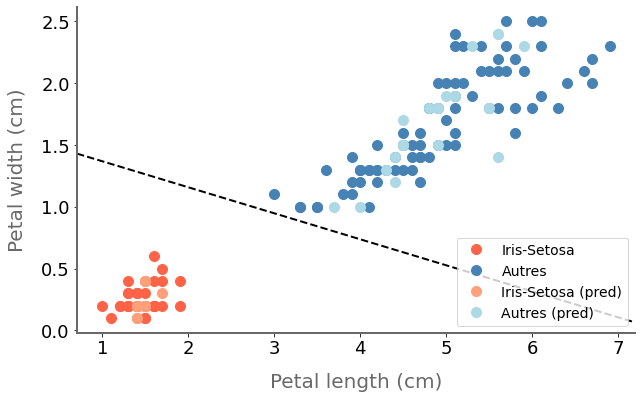

In [6]:
def plot_perceptron(x_train,y_train,x_test,y_test):
    a = -pct.coef_[0][0] / pct.coef_[0][1]
    b = -pct.intercept_ / pct.coef_[0][1]
    box=[x.min(axis=0)[0],x.max(axis=0)[0],x.min(axis=0)[1],x.max(axis=0)[1]]
    mx=(box[1]-box[0])/20
    my=(box[3]-box[2])/20
    box=[box[0]-mx,box[1]+mx,box[2]-my,box[3]+my]

    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(10,6)
 
    axs.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], "o", color='tomato', label="Iris-Setosa")
    axs.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], "o", color='steelblue',label="Autres")
    
    axs.plot(x_test[y_pred==1, 0],   x_test[y_pred==1, 1],   "o", color='lightsalmon', label="Iris-Setosa (pred)")
    axs.plot(x_test[y_pred==0, 0],   x_test[y_pred==0, 1],   "o", color='lightblue',   label="Autres (pred)")
    
    axs.plot([box[0], box[1]], [a*box[0]+b, a*box[1]+b], "k--", linewidth=2)
    axs.set_xlabel("Petal length (cm)", labelpad=15) #, fontsize=14)
    axs.set_ylabel("Petal width (cm)",  labelpad=15) #, fontsize=14)
    axs.legend(loc="lower right", fontsize=14)
    axs.set_xlim(box[0],box[1])
    axs.set_ylim(box[2],box[3])
    pwk.save_fig('01-perceptron-iris')
    plt.show()
    
plot_perceptron(x_train,y_train, x_test,y_test)

In [7]:
pwk.end()

End time is : Tuesday 26 January 2021, 11:05:36
Duration is : 00:00:00 490ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>